# Titanic - Machine Learning from Disaster
  
[목차]
1) Dataset Check
    - Null Data Check
    - Target Label Check <br></br>
2) Explortary Data Analysis
    - Pclass
    - Sex
    - Both Sex and Pclass
    - Age
    - Pclass, Sex, Age
    - Embarked
    - Family - SibSp + Parch
    - Fare
    - Cabin
    - Ticket <br></br>
3) Feature Engineering
    - Fill Null
        - Fill Null in Age using title
        - Fill Null in Embarked
    - Change Age (continuous to categorical)
    - Change Initial, Embarked and Sex (string to numerical)
    - One-Hot Encoding on Initial and Embarked
    - Drop Columns <br></br>
4) Building Machine Learning Model and Prediction using the trained model
    - Preparation - Split Dataset into train, valid, test set
    - Model Generation and Prediction
    - Feature Importance
    - Prediction on Test set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 01. Dataset Check

In [2]:
df_train = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| 변수(feature, variable) | 정의 | 설명 | 타입 |
|:-----:|:-----:|:-------:|:-----:|
|Survived|생존여부|target label. 1,0으로 표현됨|integer|
|Pclass|티켓의 클래스|1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature|integer|
|Sex|성별|male, female로 구분되면 binary|string|
|Age|나이|continuous|integer|
|sibSp|함께 탑승한 형재와 배우자 수|quantitative|integer|
|Parch|함께 탑승한 부모, 아이의 수|quantitative|integer|
|Ticket|티켓 번호|alphabat + integer |string|
|Fare|탑승료|continuous|float|
|Cabin|객실 번호|alphabat + integer|string|
|Embarked|탑승 항구|C = Cherbourg, Q = Queenstown, S = Southampton|string|

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 Null Data Check

In [6]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {: .2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value:  0.00%
column:   Survived	 Percent of NaN value:  0.00%
column:     Pclass	 Percent of NaN value:  0.00%
column:       Name	 Percent of NaN value:  0.00%
column:        Sex	 Percent of NaN value:  0.00%
column:        Age	 Percent of NaN value:  19.87%
column:      SibSp	 Percent of NaN value:  0.00%
column:      Parch	 Percent of NaN value:  0.00%
column:     Ticket	 Percent of NaN value:  0.00%
column:       Fare	 Percent of NaN value:  0.00%
column:      Cabin	 Percent of NaN value:  77.10%
column:   Embarked	 Percent of NaN value:  0.22%


In [7]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {: .2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value:  0.00%
column:     Pclass	 Percent of NaN value:  0.00%
column:       Name	 Percent of NaN value:  0.00%
column:        Sex	 Percent of NaN value:  0.00%
column:        Age	 Percent of NaN value:  20.57%
column:      SibSp	 Percent of NaN value:  0.00%
column:      Parch	 Percent of NaN value:  0.00%
column:     Ticket	 Percent of NaN value:  0.00%
column:       Fare	 Percent of NaN value:  0.24%
column:      Cabin	 Percent of NaN value:  78.23%
column:   Embarked	 Percent of NaN value:  0.00%


- Train, Test set에서 Age(둘 다 약 20%), Cabin(둘 다 약 80%), Embarked(Train set 0.22%) null data가 있음

<AxesSubplot:>

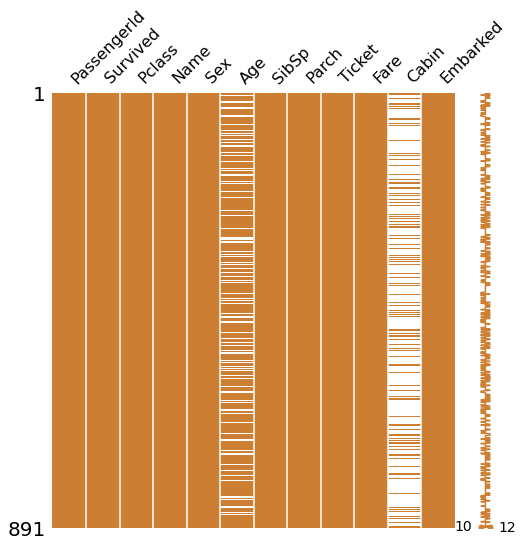

In [8]:
# MANO 라이브러리로 null data 시각화
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

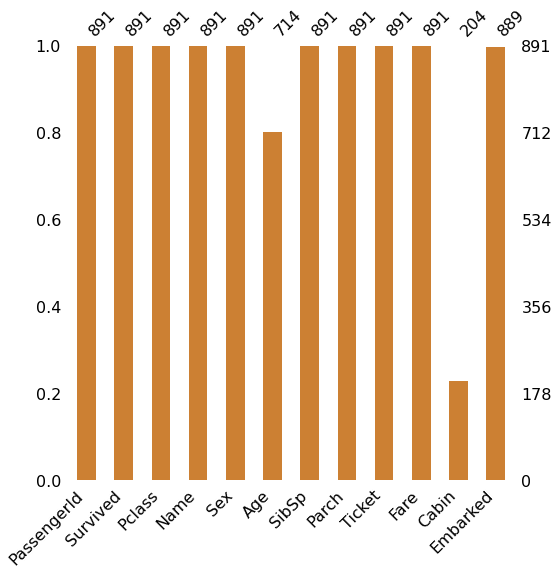

In [9]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

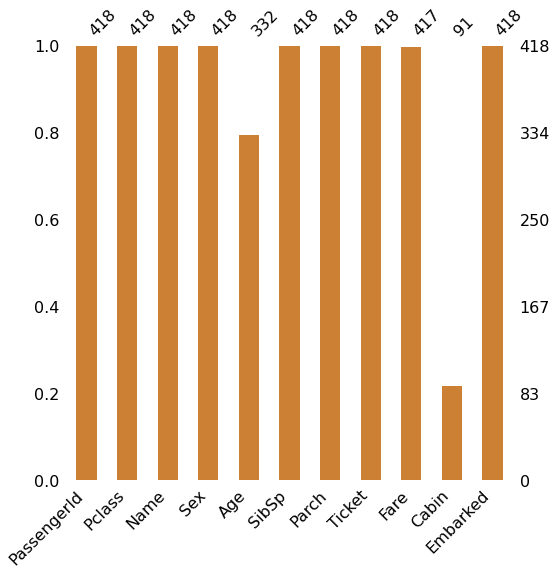

In [10]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## 1.2 Target Label Check
- Target Label이 어떤 분포를 가지고 있는지 확인한다.  
  (Binary Classification 문제의 경우, 1과 0의 분포가 어떤가에 따라 모델의 평가 방법이 달라질 수 있기 때문이다.)

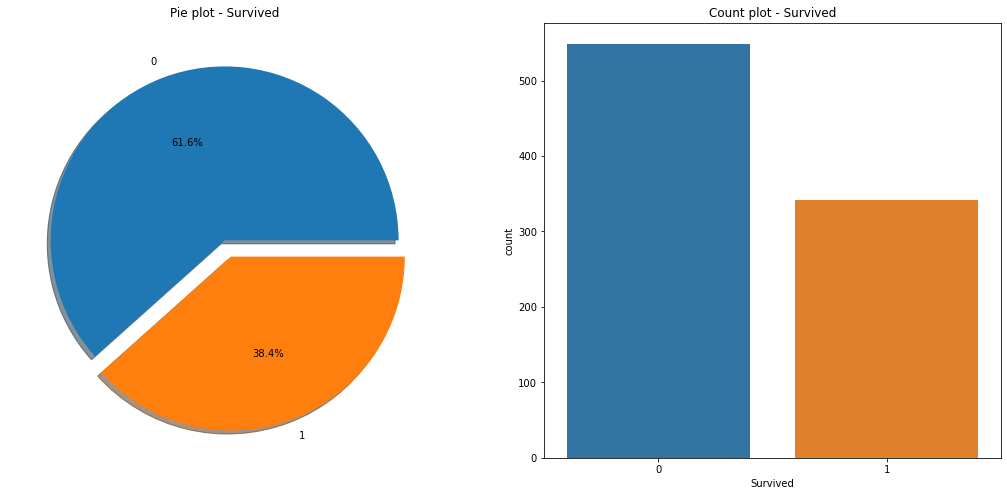

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

- 38.4%가 생존하였다.
- Target Label의 분포가 제법 균일(balanced)하다.   
  불균일한 경우, 예를 들어 100 중 1이 99, 0이 1개인 경우 만약 모델이 모든 것을 1이라고 해도 정확도가 99%가 나온다.  
  0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 된다. 지금 이 데이터에서는 그렇지 않으니 계속 진행한다.

# 2. Exploratory Data Analysis

## 2.1 Pclass
- Pclass: ordinal, 서수형 데이터이다. 카테고리이며 순서가 있는 데이터 타입이다.
- Pclass에 따른 생존률 차이
    - groupby 혹은 pivot 사용
    - 'Pclass', 'Survived'를 가져온 후, Pclass로 묶는다. 이후 각 Pclass마다 0, 1이 count되는데, 이를 평균내면 각 Pclass별 생존률이 나온다.
    - count()하면 각 class에 몇명이 있는지 확인할 수 있고, sum()하면, 216명 중 생존한(Survived=1) 사람의 총합을 준다.

In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
# pandas의 crosstab을 사용하여 위의 과정을 쉽게 해보기
# crosstab: 범주형 변수로 되어 있는 요소별로 교차분석하여 행, 열 기준 별로 빈도를 세어 도수분포표, 교차표를 만드는 메서드
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped 객체에 mean()을 하면, 각 클래스 별 생존률을 얻을 수 있다.
- class 1의 경우: 80 / (80 + 136) = 약 0.63

<AxesSubplot:xlabel='Pclass'>

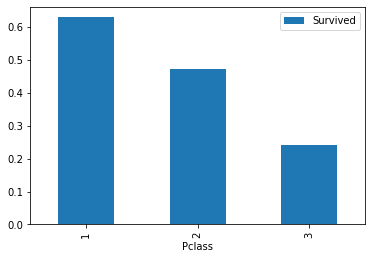

In [15]:
# as_index: groupby하면 기본적으로 그룹 라벨이 index가 된다. as_index=False하면 그룹별 index를 쓰지 않는다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- Pclass가 좋을 수록(1st) 생존률이 높다.

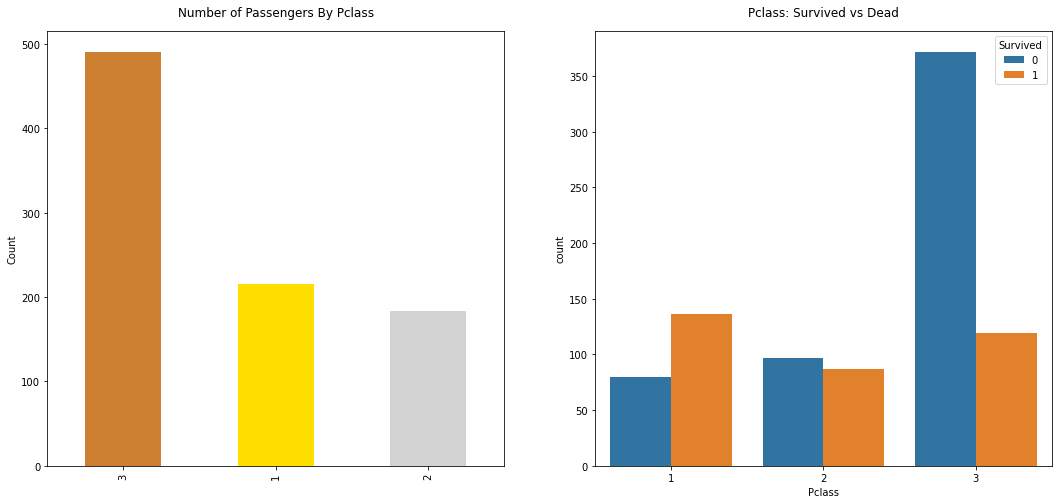

In [16]:
# seaborn의 countplot 사용: 특정 label에 따른 개수 확인
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position) # y: 제목의 위치 조정(y축을 기준으로 1.02만큼 이동)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

In [17]:
print('1클래스 생존률: ', (round(df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]['Survived'].count()/df_train[df_train['Pclass'] == 1]['Survived'].count(), 2)*100))
print('2클래스 생존률: ', (round(df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 1)]['Survived'].count()/df_train[df_train['Pclass'] == 2]['Survived'].count(), 2)*100))
print('3클래스 생존률: ', (round(df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 1)]['Survived'].count()/df_train[df_train['Pclass'] == 3]['Survived'].count(), 2)*100))

1클래스 생존률:  63.0
2클래스 생존률:  47.0
3클래스 생존률:  24.0


- 클래스가 높을 수록, 생존률이 높다. Pclass 1, 2, 3 순으로 63%, 48%, 25%이다.
- 생존에 Pclass가 큰 영향을 미친다고 볼 수 있으며, 나중에 모델을 세울 때 이 feature을 사용하는 것이 좋을 것이라 판단 가능하다.

## 2.2 Sex

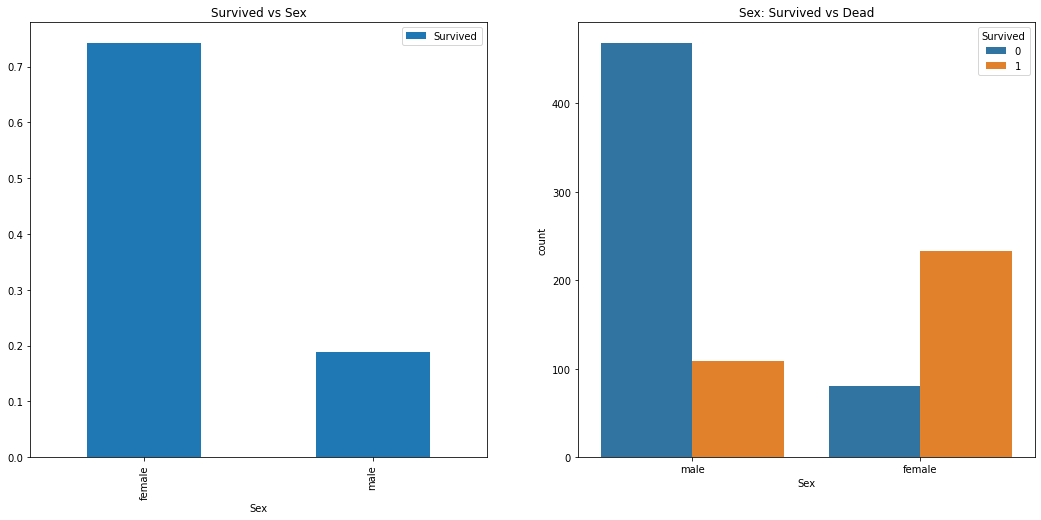

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 여자의 생존률이 높다.

In [19]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Sex도 예측 모델에 쓰일 중요한 feature임을 알 수 있다.

## 2.3 Both Sex and Pclass

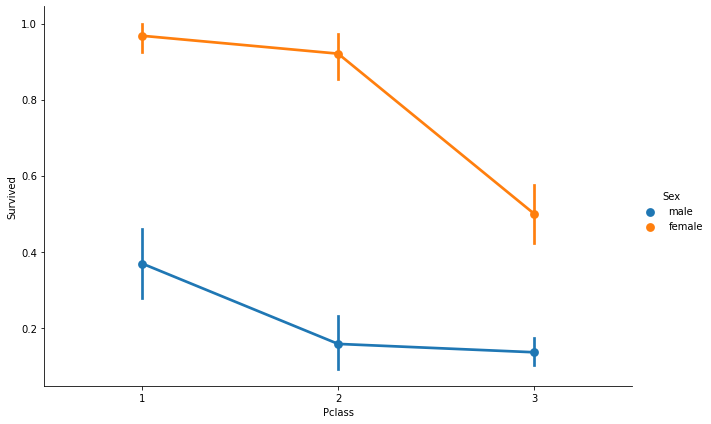

In [21]:
# seaborn의 factorplot: 3개의 차원으로 이루어진 그래프 그리기, y의 평균값 그래프로, hue로 지정된 필드의 종류만큼 라인이 그려짐

sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5) # aspect: 그림의 크기 제어

- 모든 클래스에서 female이 살 확률이 male보다 높다.
- 성별과 상관없이 클래스가 높을 수록 생존 확률이 높다.

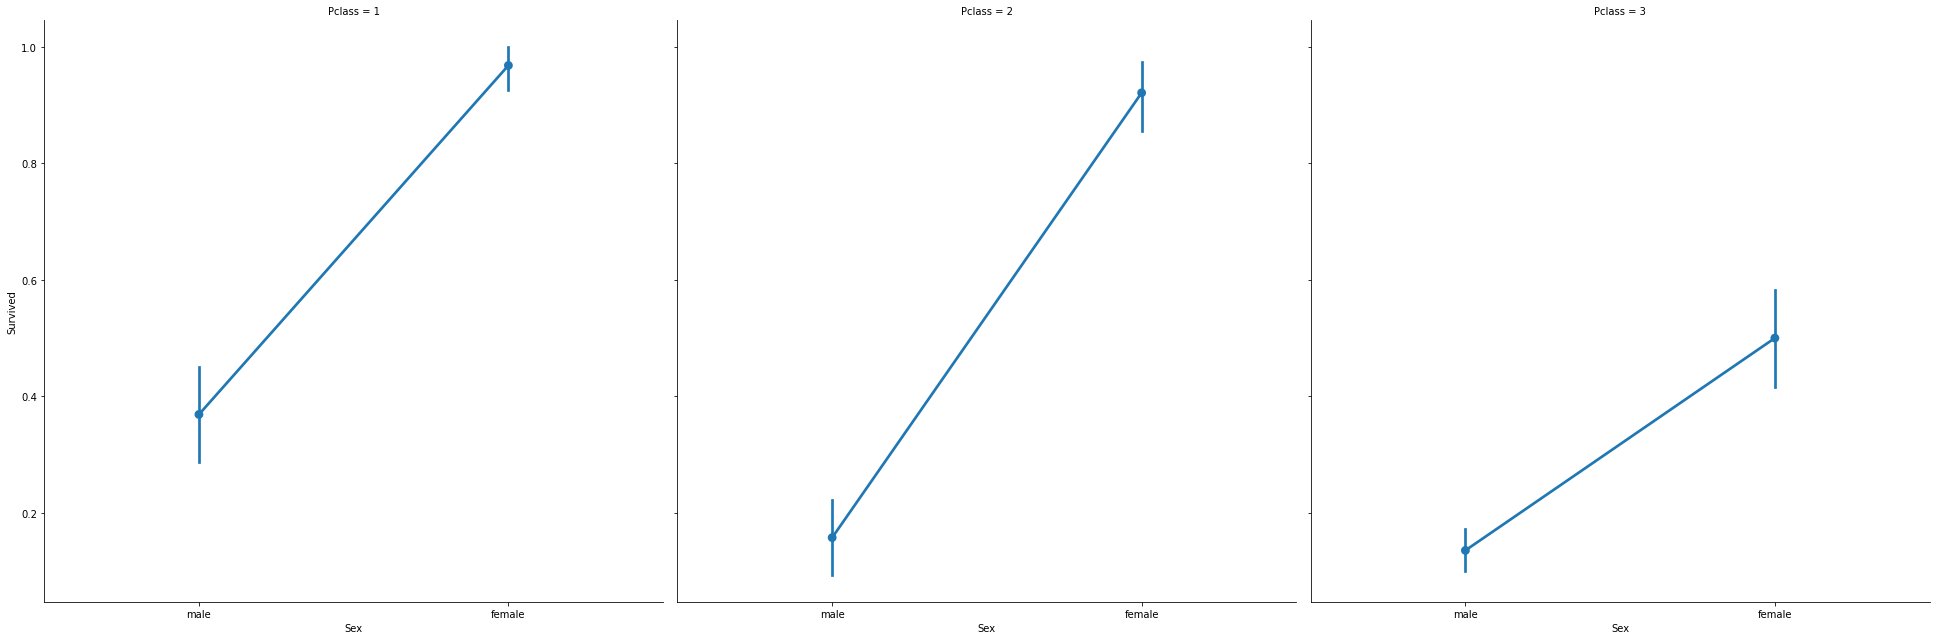

In [22]:
# 위의 그래프에서 hue 대신 column으로 변경

sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)

!!! factorplot은 더이상 쓰이지 않는 듯! catplot으로 개선되어서 나왔다고 한다.

## 2.4 Age

In [23]:
print('제일 나이 많은 탑승객: {: .1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {: .1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {: .1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객:  80.0 Years
제일 어린 탑승객:  0.4 Years
탑승객 평균 나이:  29.7 Years


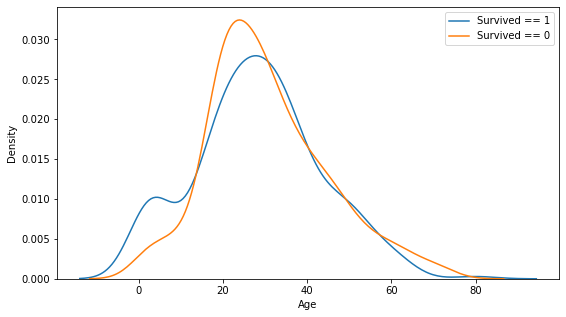

In [24]:
# 생존에 따른 Age의 histogram(밀도추정의 간단한 방법) -> kdeplot으로 간단히 구현할 수 있다.
# 확률밀도: 변수 x가 a라는 값을 가질 상대적인 가능성
# 히스토그램: 도수분포를 정보그림으로 나타낸 것
# -> 즉, 관측된 데이터들로부터 히스토그램을 구한 뒤, 구해진 히스토그램을 정규화하여 확률밀도함수로 사용하는 것

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 생존자 중 나이가 어린 경우가 많다.

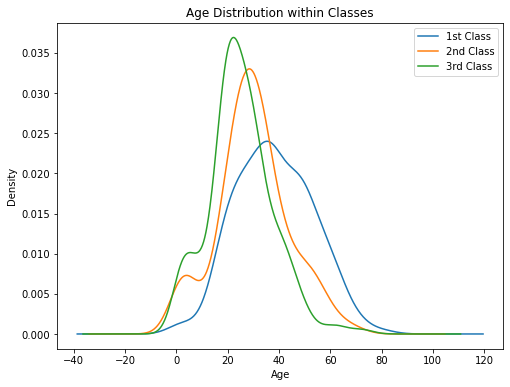

In [25]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- Class가 높을 수록 나이 많은 사람의 비중이 크다.

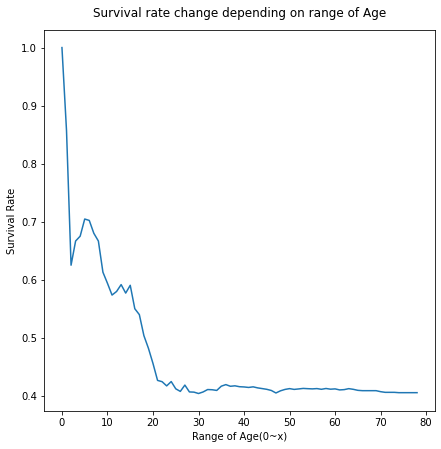

In [26]:
# 나이대가 변함에 따라 생존률의 변화
# 나이 범위를 점점 넓혀가며, 생존률을 살펴보자.

cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival Rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴 수록 생존률이 확실히 높다.
- Age가 중요한 feature로 사용될 수 있다.

## 2.5 Pclass, Sex, Age

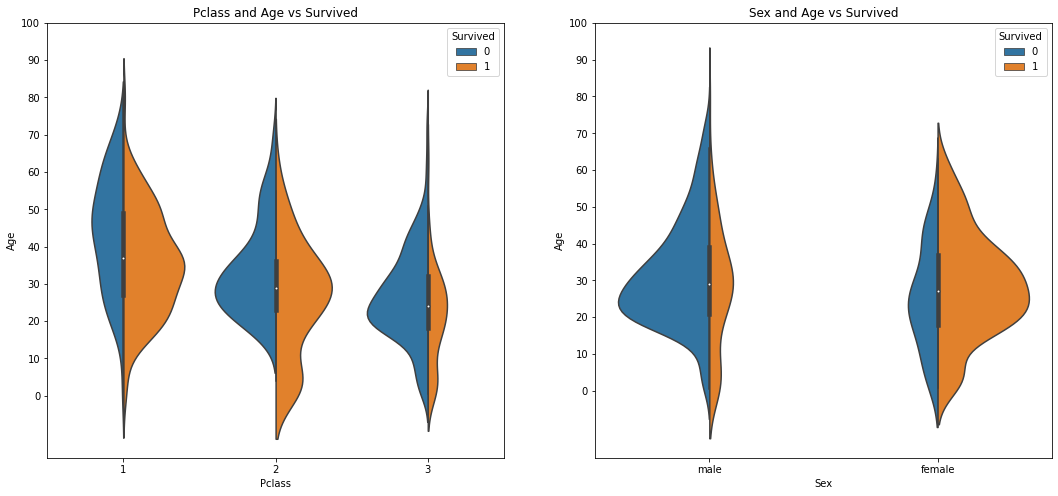

In [27]:
# violinplot: boxplot과 비슷하지만, 조금 더 실제에 가까운 분포를 알 수 있다.

f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0], showextrema=True)
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1], showextrema=True)
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

# ??? 왜 0 이하의 값들도 있는 것처럼 표기될까? 
# ??? showextrema를 하면 최소값, 최대값에 직선이 표시되기 때문에(default긴 하지만 혹시 몰라 다시 넣어봄) 설정을 바꿔봤지만 똑같은 그래프가 출력되었다.

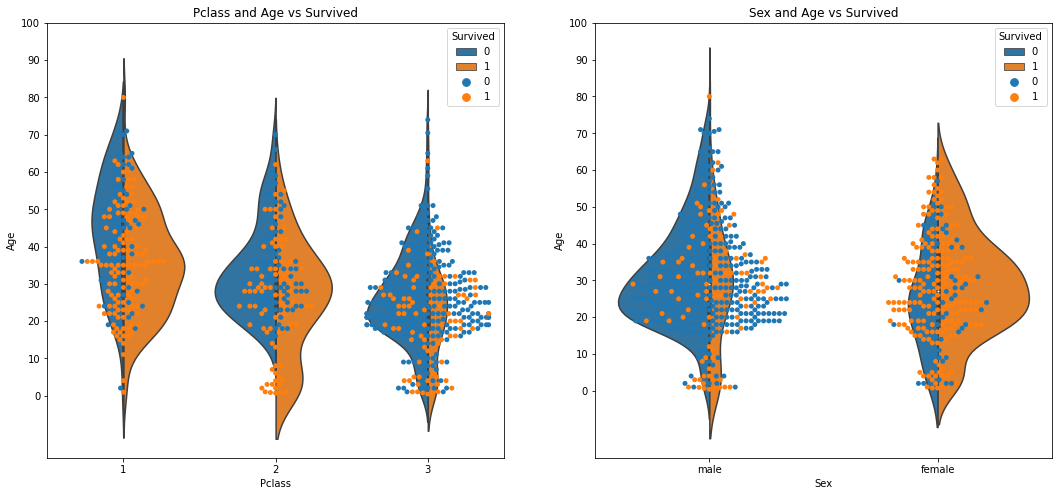

In [33]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0], showextrema=True)
sns.swarmplot('Pclass', 'Age', hue='Survived', data=df_train, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1], showextrema=True)
sns.swarmplot('Sex', 'Age', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

!!! swarmplot과 같이 써보니 0이 최소점이라는 걸 확인할 수 있었다.  

- 왼쪽 그래프: Pclass 별로 Age의 분포가 어떻게 다른지에 생존여부에 따라 구분한 그래프
- 오른쪽 그래프: 왼쪽과 마찬가지로 Sex와 생존에 따른 분포가 어떻게 다른지 보여주는 그래프
- 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 했다.
- 여자가 생존을 더 많이 했다.
- 여성과 아이를 먼저 챙겼다.

## 2.6 Embarked
- Embarked: 탑승한 항구

<AxesSubplot:xlabel='Embarked'>

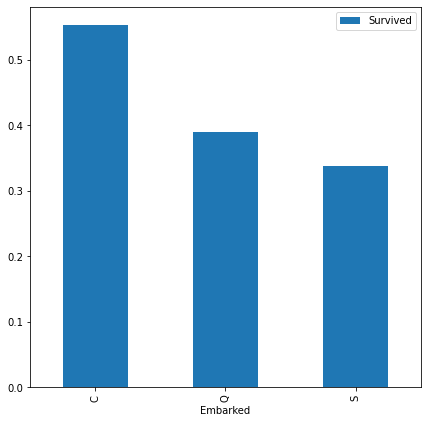

In [34]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 생존률은 거의 비슷하지만, 그래도 C가 가장 높다.
- 모델에 사용하기로 한다. (이후 feature들이 얼마나 중요한 역할을 하는지 살펴볼 것)

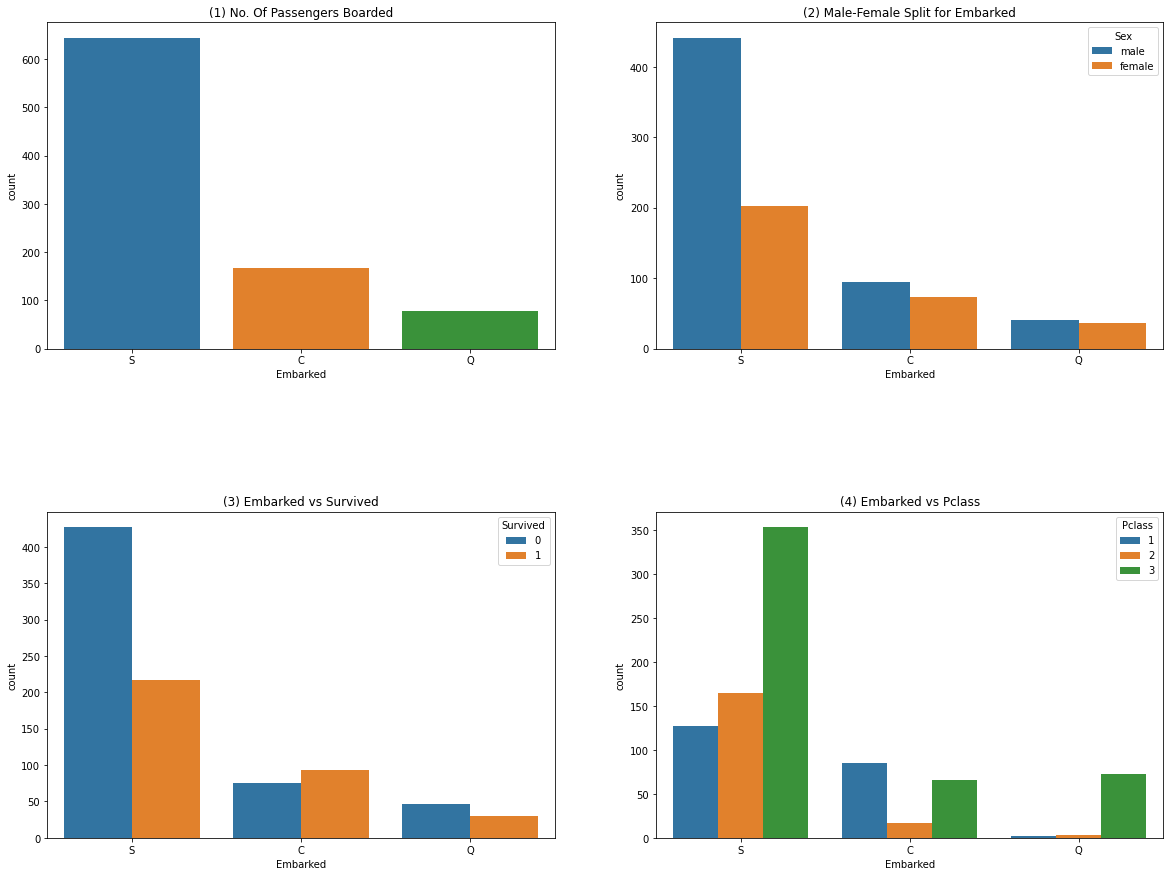

In [35]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1): 전체적으로 봤을 때 S에서 가장 많은 사람이 탑승했다.
- Figure(2): C와 Q는 남녀 비율이 비슷하고, S는 남자가 더 많다.
- Figure(3): 생존확률은 S의 경우 많이 낮다. 
- Figure(4): Class로 split해서 보니, C가 생존 확률이 높은 건 클래스가 높은 사람이 많이 탔기 때문이다. S는 3rd class가 많아 생존확률이 낮다.

## 2.7 Family - SibSp(형제, 자매) + Parch(부모, 자녀)
- SibSP와 Parch를 합하면 Family가 된다. Family로 합쳐서 분석한다.

In [36]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자기 자신을 더한다.
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [37]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


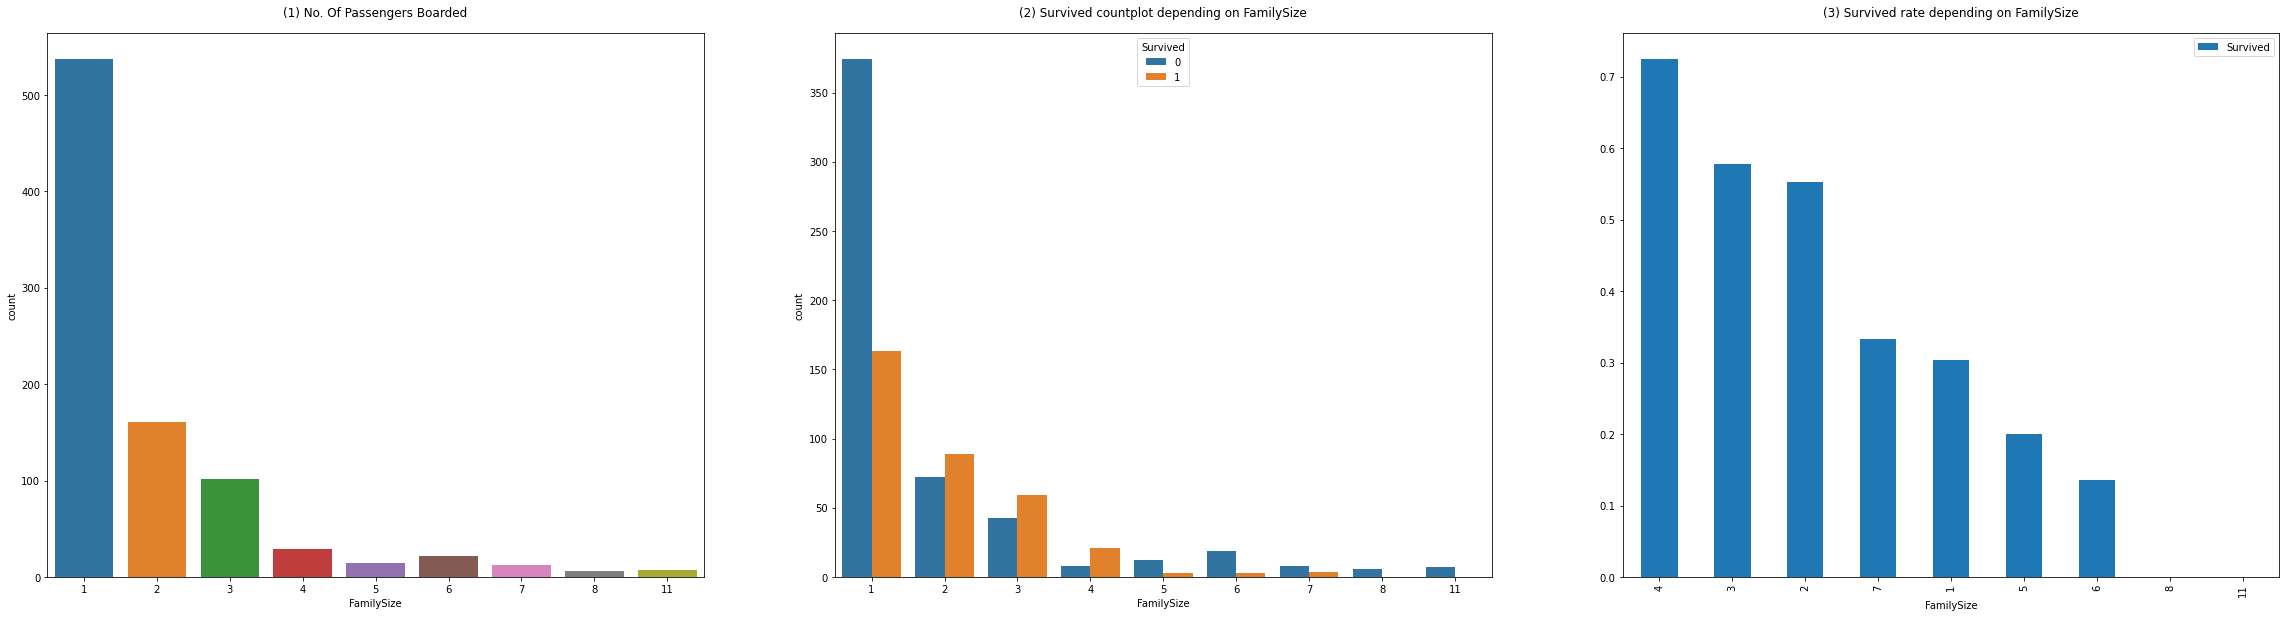

In [38]:
# FamilySize와 생존과의 관계

f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1): 가족 크기는 1~11까지 있다. 대부분이 1명이고 그 다음으로 2, 3, 4명이다.
- Figure(2), (3): 가족 크기에 따른 생존 비교 그래프. 가족이 4명인 경우 생존 확률이 가장 높다. 가족 수가 많아질 수록(5, 6, 8, 11), 생존 확률이 낮아진다. 가족 수가 너무 작아도(1), 너무 커도 생존 확률이 낮다. 3~4명 선에서 생존 확률이 높다.

## 2.8 Fare
- Fare: 탑승 요금, continuous feature

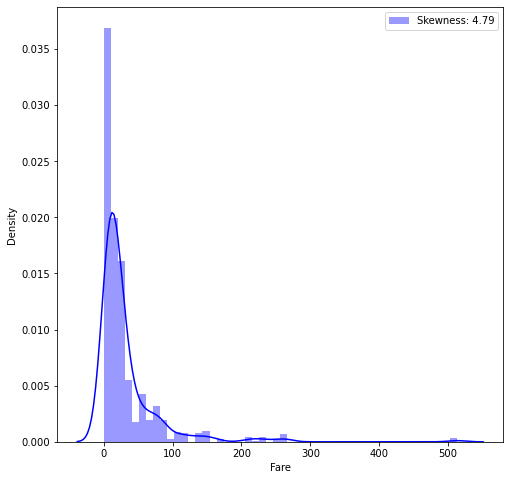

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 분포가 매우 비대칭이다. (hign skewness) 이대로 모델에 넣으면 잘못 학습할 수 있다. (outlier에 너무 민감하게 반응한다면, 실제 예측시 좋지 못한 결과가 나올 가능성이 높다.)
- outlier의 영향을 줄이기 위해 Fare에 log를 취한다.

In [40]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # test set에 있는 NaN값을 평균값으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

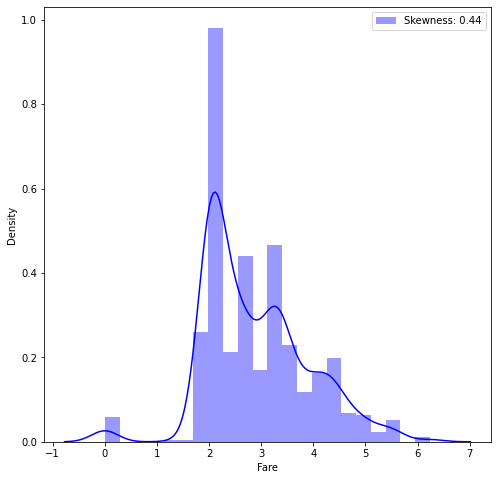

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log를 취하니 비댕칭성이 많이 사라졌다.
- 이 작업은 feature engineering에 들어가는 부분인데, 먼저 작업하였다.
- feature engineering: 모델을 학습시키고, 성능을 높이기 위해 feature들에 여러 조작을 가하거나, 새로운 feature을 추가하는 것

## 2.9 Cabin
- 이 feature는 NaN이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기 쉽지 않다.
- 그러므로 우리가 세우려는 모델에 포함시키지 않는다.

## 2.10 Ticket
- string data이므로 작업이 필요하다.
- 여기서는 따로 작업을 하지는 않고 넘어간다.

In [42]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

# 3. Feature Engineering
- dataset에 존재하는 null data를 채운다.
- 아무 숫자로 채울 수는 없고, null data를 포함하는 feature의 statistics를 참고하거나, 다른 아이디어를 짜내어 채울 수 있다.
- null data를 어떻게 채우냐에 따라 모델의 성능이 좌지우지될 수 있기 때문에, 신경써줘야 할 부분이다.
- Feature Engineering은 실제 모델의 학습에 쓰려고 하는 것이므로, train뿐만 아니라 test도 똑같이 적용해줘야 한다.

## 3.1 Fill Null
### 3.1.1 Fill Null in Age using title
- Age에는 null data가 177개나 있다. 여기서 우리는 title + statistics를 사용한다.
- 영어에는 Miss, Mrr, Mrs와 같은 title이 존재한다. 각 탑승객의 이름에는 이런 title이 들어가는 데 이를 사용한다.

In [43]:
# str 메서드를 사용하여 data를 string으로 바꿔준다. 여기에 정규표현식을 적용하는 extract 메서드를 사용한다. 이를 Initial 컬럼에 저장한다.
# 지정한 정규표현식에 맞는 문자열을 추출하여(extract) Initial 열에 넣어주는 코드

df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [44]:
# Initial과 Sex간의 count 살펴보기

pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [45]:
df_train['Initial'].replace(
    ['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
    ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

df_test['Initial'].replace(
    ['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
    ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

In [46]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- 여성과 관계있는 Miss, Mr, Mrs 가 생존률이 높다.

<AxesSubplot:xlabel='Initial'>

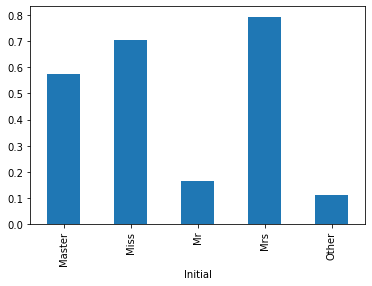

In [47]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

- statistics를 활용해 null data를 채운다.
- statistics는 train data의 것을 의미한다. test는 unseen으로 둔 상태로 놔둬야 하며, train에서 얻은 statistics를 기반으로 test의 null data를 채워야 한다.

In [48]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- Age의 평균을 이용해 null data를 채운다.

In [49]:
# isnull()이면서 Mr인 조건을 만족하는 row(탑승객)의 Age를 33으로 치환한다.
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Other'), 'Age'] = 46

df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Other'), 'Age'] = 46

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  Initial      891 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


### 3.1.2 Fill Null in Embarked

In [51]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


- Embarked에는 2개의 null data가 있고, S에서 가장 많은 탑승객이 있었으므로, 간단하게 Null을 S로 채운다.

In [52]:
df_train['Embarked'].fillna('S', inplace=True)

## 3.2 Change Age(continuous to categorical)
- Age는 continous feature이다. 이대로 모델에 사용할 수도 있지만, Age를 몇 개의 그룹으로 나누어 category화 시켜줄 수도 있다.
- continuous를 categorical로 바꾸면 자칫 imformation loss가 생길 수도 있지만, 다양한 방법을 사용해보기 위해 진행한다.

In [53]:
# 첫 번째 방법: loc를 사용

df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [54]:
# 두 번째 방법: 함수를 만들어 apply 메서드 사용

def category_age(x):
    if x < 10: return 0
    elif x < 20: return 1
    elif x < 30: return 2
    elif x < 40: return 3
    elif x < 50: return 4
    elif x < 60: return 5
    elif x < 70: return 6
    else: return 7

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [55]:
# all(): 모든 값이 True면, True, 하나라도 False가 있으면 False를 반환
print('1번 방법, 2번 방법 둘 다 같은 결과를 내면 True를 줘야함 ->', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘 다 같은 결과를 내면 True를 줘야함 -> True


In [56]:
# 중복되는 Age_cat 컬럼과 원래 컬럼 Age 제거
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

## 3.3 Change Initial, Embarked and Sex (stiring to numerical)
- category로 표현된 컬럼은 모델이 인식할 수 있도록 수치화 시켜줘야 한다.

In [57]:
# Initial 변환
# map 메서드를 통해 변환. 사전 순서대로 mapping 한다.
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [58]:
# Embarked도 C, Q, S로 이뤄져 있으므로 변환
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [59]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [60]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [61]:
df_train['Embarked'].isnull().any()

False

In [62]:
# Sex도 변환
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

- 상관관계를 살펴본다.
- 상관관계(Pearson Correlation): -1로 갈수록 음의 상관관계, 1로 갈수록 양의 상관관계를 의미하며, 0은 상관관계가 없음을 의미한다.

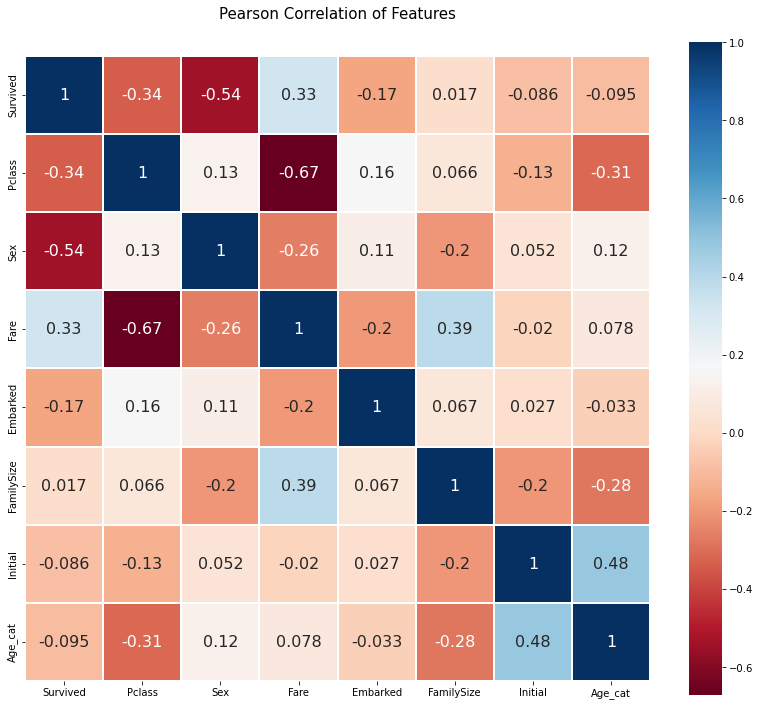

In [63]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16})

del heatmap_data

- Sex와 Pclass가 Survived에 어느정도 상관관계가 있다.
- Fare와 Embarked도 상관관계가 있다.
- heatmap을 통해 얻을 수 있는 정보는 강한 상관관계를 가지는 feature들이 없다는 것이다.
- 이것은 모델을 학습시킬 때, 불필요한(redundant, superfluous) feature가 없다는 것을 의미한다.  
    (1 또는 -1의 상관관계를 가진 feature A, B가 있다면, 얻을 수 있는 정보는 사실 하나일 것이기 때문)

## 3.4 One-hot Encoding on Initial and Embarked
- 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding 할 수 있다.
- 수치화: 간단히 Master == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4로 매핑해주는 것
- One-hot encoding: 카테고리를 (0, 1)로 이루어진 5차원의 벡터로 나타내는 것(위의 예시 사용한다면)

In [64]:
# get_dummies 사용하여 one-hot encoding
# one-hot encoding 하면 5개의 column이 생기므로, Initial 칼럼은 prefix로 두어 구분이 쉽게 만들어준다.

df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [65]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [66]:
# Embarked 도 one-hot encoding
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

- sklearn의 Labelencoder + OneHotencoder을 이용해도 one-hot encoding 가능

## 3.5 Drop Columns
- 필요한 columns만 남기고 다 지운다.

In [67]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [68]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [69]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


# 4. Building Machine Learning Model and Prediction using the Trained Model

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

- 타이타닉 문제는 target class(Survived)가 있으며, target class는 0, 1로 이뤄져 있으므로 binary classification 문제이다.
- 과정
    - train set의 Survived를 제외한 input을 가지고 모델을 최적화 시켜 각 샘플의 생존 유무를 판단하는 모델을 만든다.
    - 이후 모델이 학습하지 않았던 test set을 input으로 주어 test set의 생존유무를 예측한다.

## 4.1 Preparation: Split dataset into train, valid, test set


In [71]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [72]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

## 4.2 Model Generation and Prediction

- 이유한 님은 파라미터 튜닝은 하지 않고 default 세팅으로 진행했다. 했을 때 정확도(내 컴퓨터 기준): 82.84% (X_vld)
- GridSearchCV를 사용하여 하이퍼 파라미터 튜닝을 진행했을 때, 얼마나 성능 차이가 있는지 확인한다.


In [77]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [10, 100],
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [6, 8, 12],
    'min_samples_split': [6, 8, 16]
}

rf_clf = RandomForestClassifier(random_state=2022, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_tr, y_tr)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 100}
최고 예측 정확도: 0.8170


In [79]:
prediction = grid_cv.predict(X_vld)
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 86.57% 정확도로 생존을 맞춤


- 이유한님 커널(하이퍼 파라미터 조정 X): 총 268명 중 82.84% 정확도로 생존을 맞춤
- GridSearchCV 사용: 총 268명 중 86.57% 정확도로 생존을 맞춤
- => 약 4%의 성능이 좋아졌다.

## 4.3 Feature Importance

In [80]:
from pandas import Series

In [82]:
feature_importance = grid_cv.best_estimator_.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

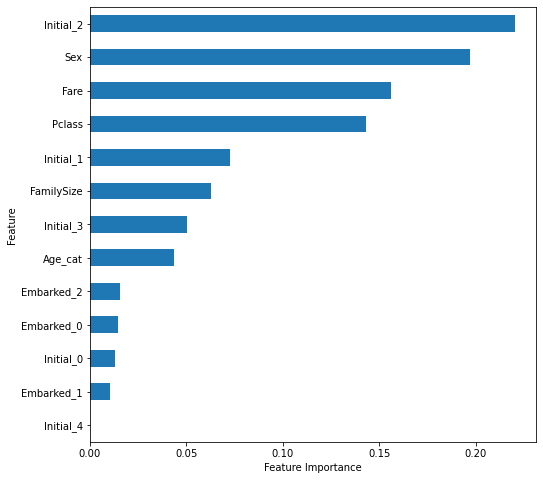

In [83]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

- 이유한님 커널과는 약간의 차이가 있다. (이유한님 커널 중요도 순위: Fare, Initial_2, Age_cat, Pclass ...)
- 이 feature importance를 보고 실제로 Fare가 중요한 feature일 수 있다고 판단내릴 수는 있지만, 이건 결국 모델에 귀속되는 결론 중 하나이므로 통계적으로 더 살펴볼 필요가 있다.
- feature importance를 가지고 좀 더 정확도가 높은 모델을 얻기 위해 feature selection을 할 수도 있고, 좀 더 빠른 모델을 위해 feature을 제거할 수도 있다.

## 4.4 Prediction on Test set

In [84]:
submission = pd.read_csv('./titanic/gender_submission.csv')

In [85]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [86]:
prediction = grid_cv.predict(X_test)
submission['Survived'] = prediction

In [87]:
submission.to_csv('./titanic/my_titanic_submission.csv', index=False)

- 하이퍼 파라미터 튜닝 전 kaggle score: 0.76555
- 하이퍼 파라미터 튜닝 후 kaggle score: 0.77990